### Loan Application Status Prediction
`Project Description`:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

`Independent Variables`:
  1. `Loan_ID` - This refer to the unique identifier of the applicant's affirmed purchases
  2. `Gender` - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
  3. `Married` - This refers to applicant being in a state of matrimony
  4. `Dependents` - This refres to persons who depends on the applicants for survival
  5. `Education` - This refers to number of years in which applicant received systematic instruction, especially at a school or university
  6. `Self_Employed` - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
  7. `Applicant Income` - This refers to disposable income available for the applicant's use under State law.
  8. `CoapplicantIncome` - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
  9. `Loan_Amount` - This refers to the amount of money an applicant owe at any given time.
  10. `Loan_Amount_Term` - This refers to the duaration in which the loan is availed to the applicant
  11. `Credit History` - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
  12. `Property_Area` - This refers to the total area within the boundaries of the property as set out in Schedule.
  13. `Loan_Status` - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1]:
# importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Creating a dataFrame with the given data set
df = pd.read_csv(r"D:\DataSets\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

We can see that the rows in this dataset are 614 and 13 columns. In the problem statement the Loan_Status as the label and using the remaining columns to be used as features. This implies that the problem is a Classification problem.


#### Exploratory Data Analysis

In [4]:
df.drop('Loan_ID', axis = 1, inplace = True)

The Feature `Loan_ID` is unique for every row and making no possible co-dependence on any other feature. Hence chose to drop the feature.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


`Note`:
1.  integer data type : 1
2.  float data type : 4
3.  object data type : 7

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [40]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

The Columns, `Gender`,`Married`,`Dependents`,`Self_Employed`,`LoanAmount`,`Loan_Amount_Term`,`Credit_History` have missing Values. And needs attention.

In [8]:
# Segregation in Object_data type
obj_datatype = []
for i in df.dtypes.index:
  if df.dtypes[i] == 'object':
    obj_datatype.append(i)

num_datatype = []
for i in df.dtypes.index:
  if df.dtypes[i] == 'float64' or df.dtypes[i] == 'int64':
    num_datatype.append(i)

print(obj_datatype)
print(num_datatype)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [9]:
for i in obj_datatype:
  print(df[i].value_counts())
  print('-'*100)

Gender
Male      489
Female    112
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Married
Yes    398
No     213
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
------------------------------------------------------------------------

In [10]:
# filling the missing values
# for columns containing continuous data, treating the column with mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [11]:
# for columns containing categorical data, treating the column with mode
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Visualization of Data

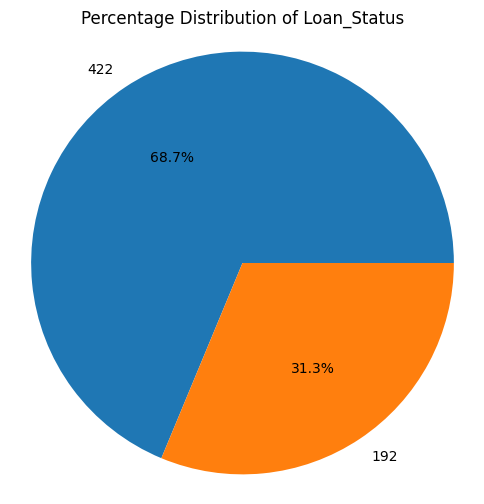

In [13]:
# for percentage distribution of Loan Status
plt.figure(figsize=(6, 6))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts(), autopct = '%1.1f%%', startangle = 0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Distribution of Loan_Status')
plt.show()

`Note`: With the Blue field as Yes and Orange Field as No. We can see that 68.7 % of loan status is approved and 31.3 % are rejected.

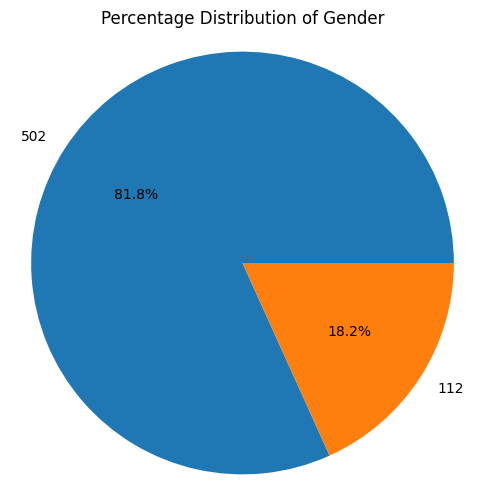

In [14]:
# for percentage distribution of Gender
plt.figure(figsize=(6, 6))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts(), autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Distribution of Gender')
plt.show()

`Note`: With the Blue field as Male and Orange Field as Female. We can see that 81.8 % are Male Applicants and 18.2 % are Female Applicants.

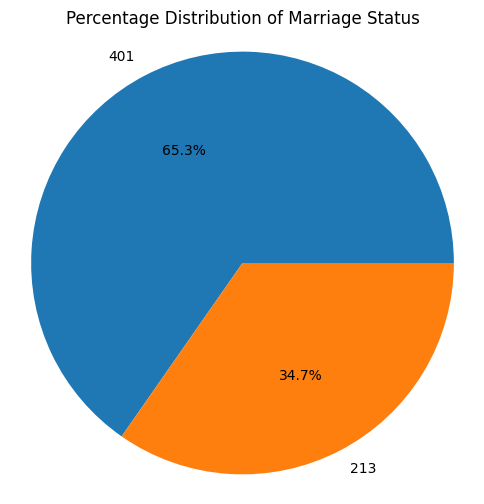

In [15]:
# for percentage distribution of Married
plt.figure(figsize=(6, 6))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts(), autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Distribution of Marriage Status')
plt.show()

`Note`: With Blue as Married and Orange as Unmarried, We can see that 65.3 % applicants are married and 34.7 % are unmarried.

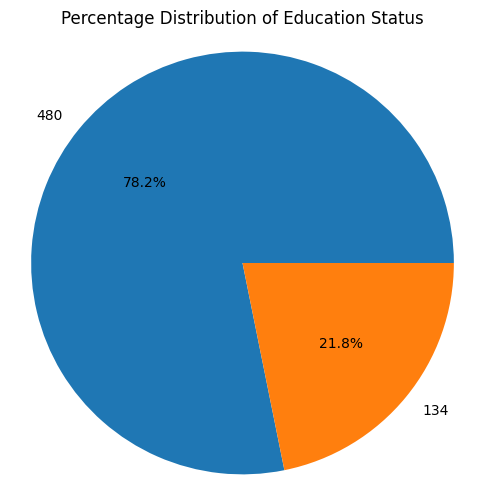

In [16]:
# for percentage distribution of Education Status
plt.figure(figsize=(6, 6))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts(), autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Distribution of Education Status')
plt.show()

`Note`: Blue as Graduate and Orange as Not Graduate, We can see that 78.2 % of applicants are Graduate and 21.8 % are not Graduate.

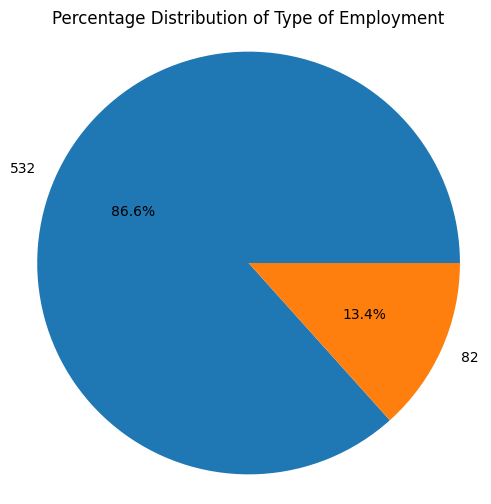

In [17]:
# for percentage distribution of Self Employed
plt.figure(figsize=(6, 6))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts(), autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Distribution of Type of Employment')
plt.show()

`Note`: Blue as Self-Employed and Orange as not a Self_Employee. We can see that 86.6 % of applicants are self Employed and 13.4 % are not Self-employed.

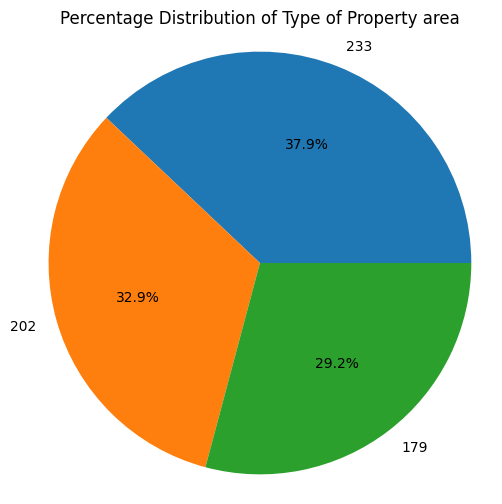

In [18]:
# for percentage distribution of Property Area
plt.figure(figsize=(6, 6))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts(), autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Distribution of Type of Property area')
plt.show()

`Note`: With Orange as Urban, Blue as Semiurban and green as Rural. We can see that 32.9 % of applicants lives in urban areas, 37.9 % of applicants lives in Semiurban areas, 29.2 % of applicants lives in Rural areas

#### Visualization for Numeric Labels with Loan_Status

<Axes: xlabel='LoanAmount', ylabel='CoapplicantIncome'>

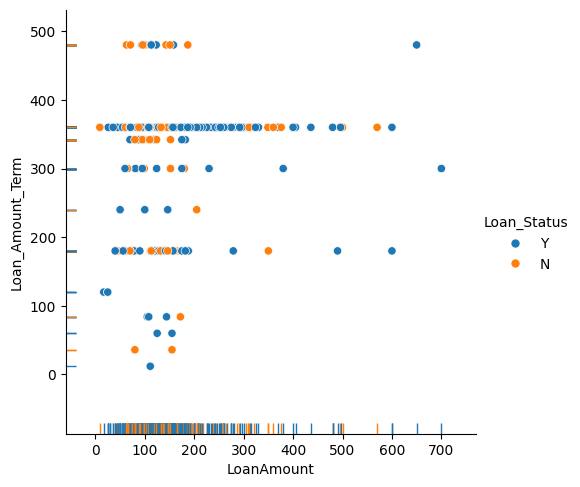

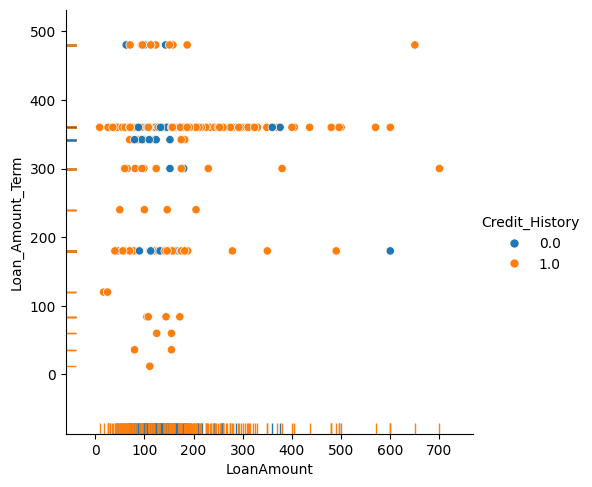

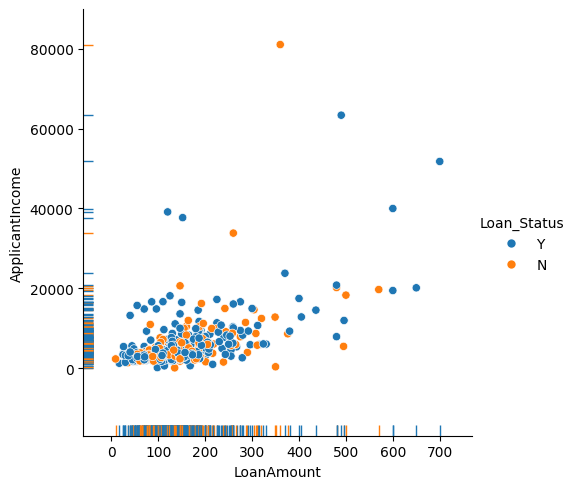

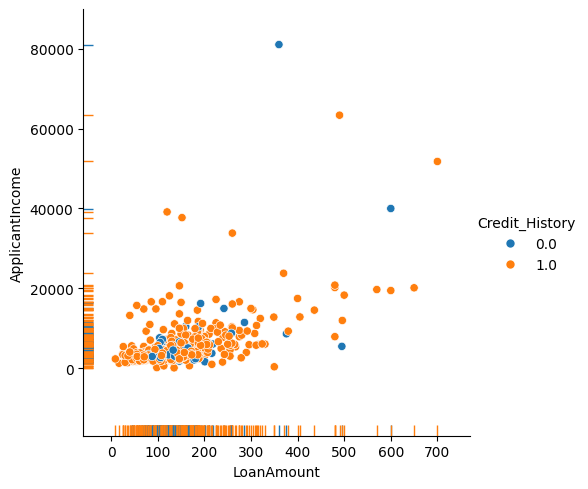

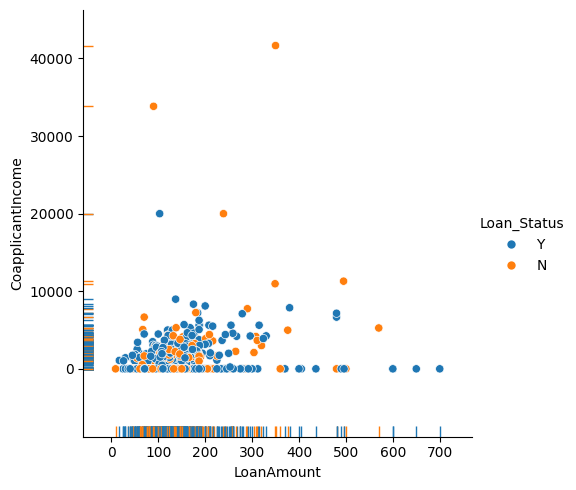

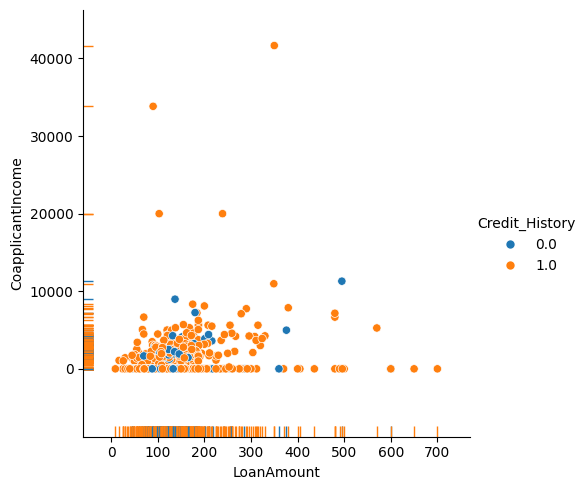

In [19]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', legend=False)
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History', legend=False)

`Note`:
1.  Most Applicant Income is ranging from 0-20000 for the loan Amount in the range 0 - 400
2.  Most Co-Applicant Income Ranges from 0-10000 for loan amount 0-300

In [20]:
# Using label Encoder to convert the object data in Loan_Status in Numerical Format
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
lb_e = LabelEncoder()
df['Loan_Status'] = lb_e.fit_transform(df['Loan_Status'])

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [22]:
oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


In [23]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\pradu\AppData\Local\Temp\ipykernel_10816\389692436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = column, data = df, ax=ax[index], palette='Set1')
C:\Users\pradu\AppData\Local\Temp\ipykernel_10816\389692436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = column, data = df, ax=ax[index], palette='Set1')
C:\Users\pradu\AppData\Local\Temp\ipykernel_10816\389692436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = column, data = df, ax=ax[index], palette='Set1')
C:\Users\pradu\AppData\Local\Temp\ipykernel_10816\38

<Figure size 2500x2500 with 0 Axes>

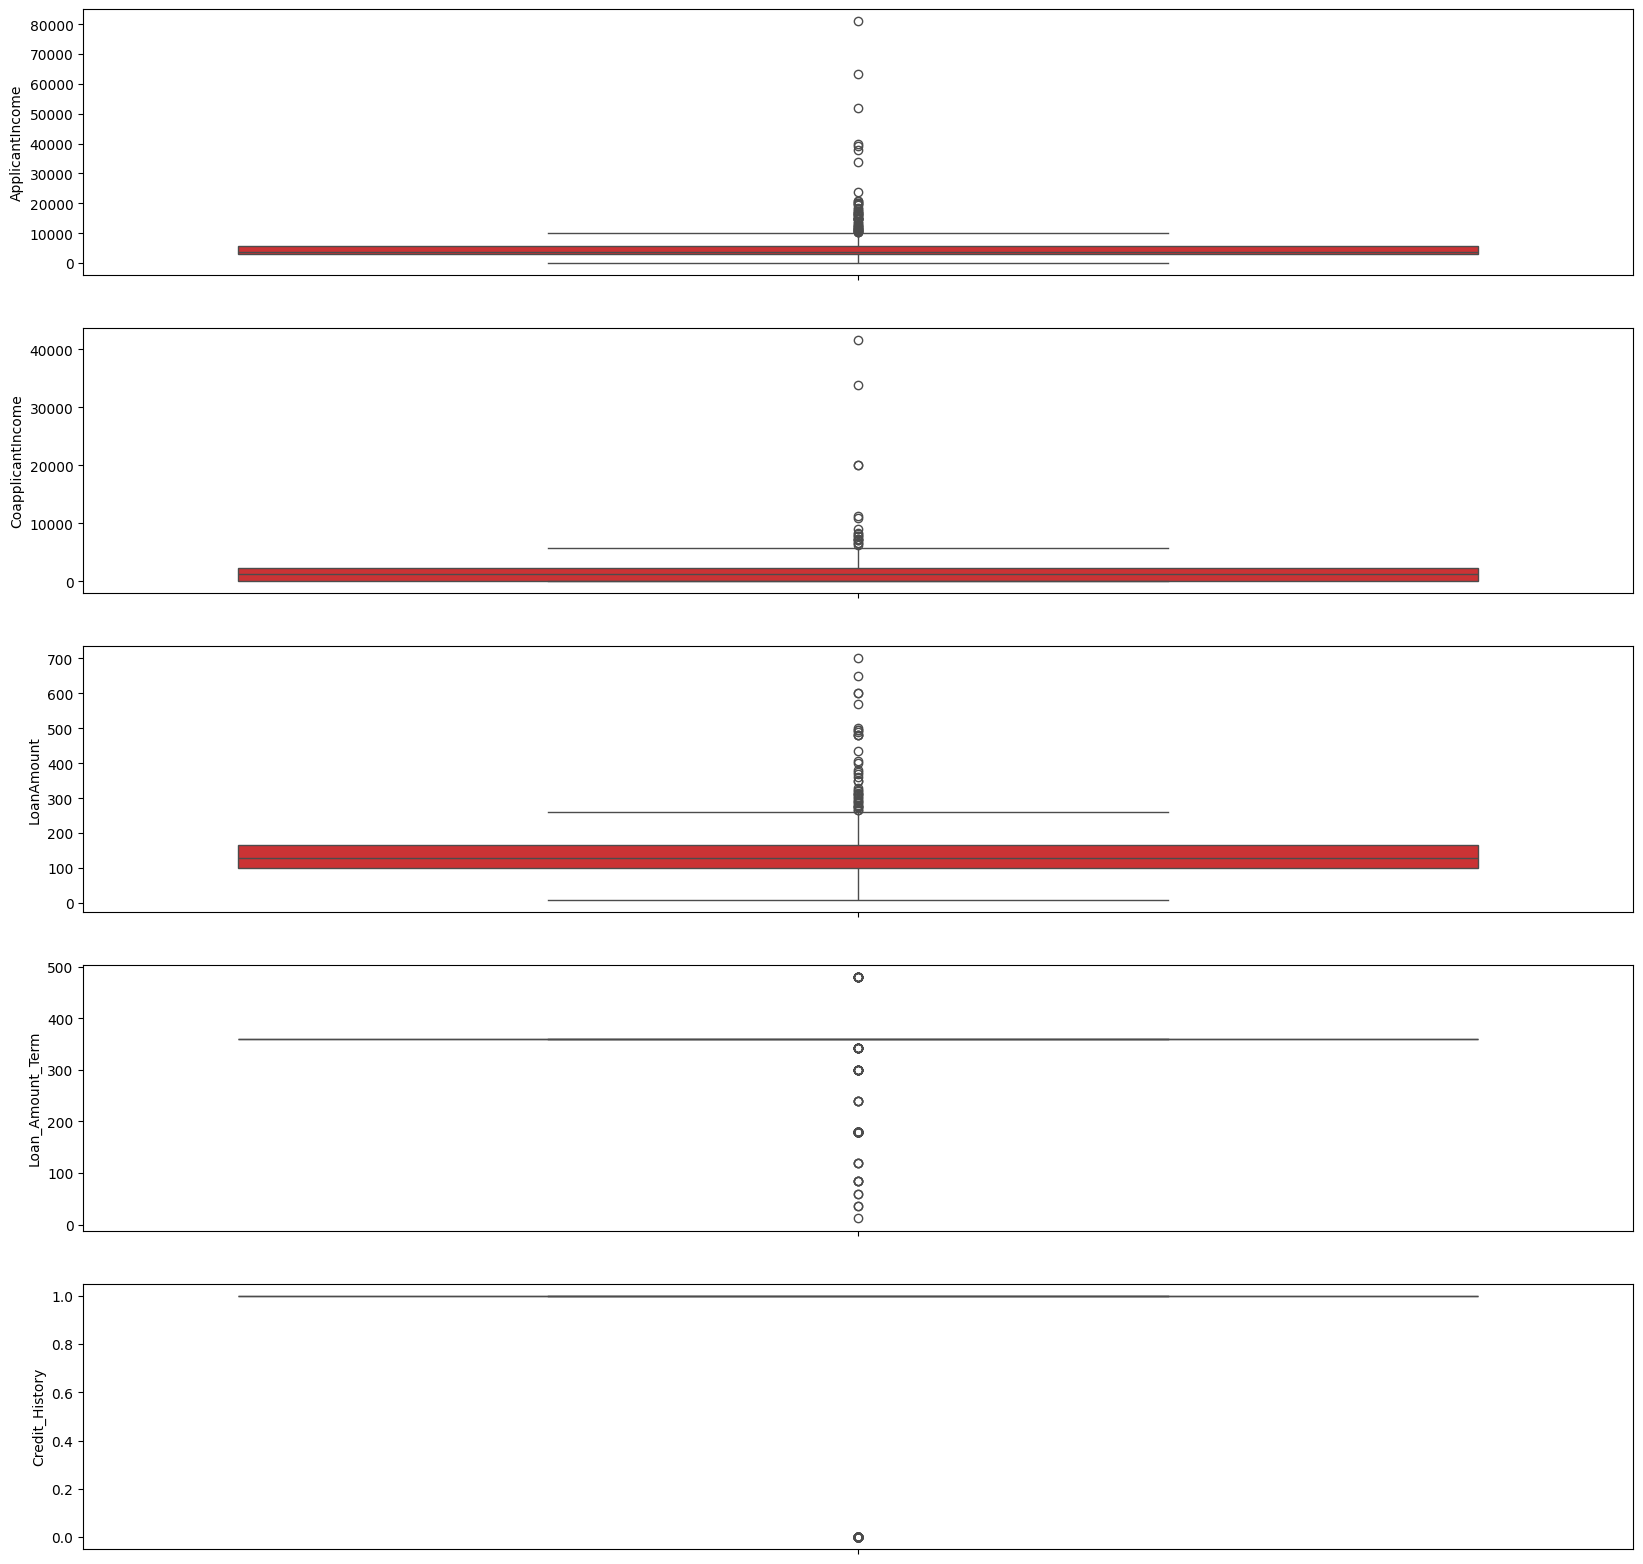

In [24]:
# for outliers :- 
plt.figure(figsize=(25, 25), facecolor='green')
fig, ax = plt.subplots(5,1, figsize=(20, 20))
index = 0
ax = ax.flatten()
for column ,value in df[num_datatype].items():
    sns.boxplot(y = column, data = df, ax=ax[index], palette='Set1')
    index = index + 1
plt.show()

`Note`: We can see that in Columns `ApplicationIncome`,`CoapplicationIncome`,`LoanAmount`,`Loan_Amount_Term`,`Credit_History` are having outliers present in them

In [25]:
# for skew test in the data 
skewness = df[num_datatype].skew()
print("Skewness")
print('-'*100)
print(skewness)

Skewness
----------------------------------------------------------------------------------------------------
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64


Skewness is present in the labels in which numerical data is present

<Axes: >

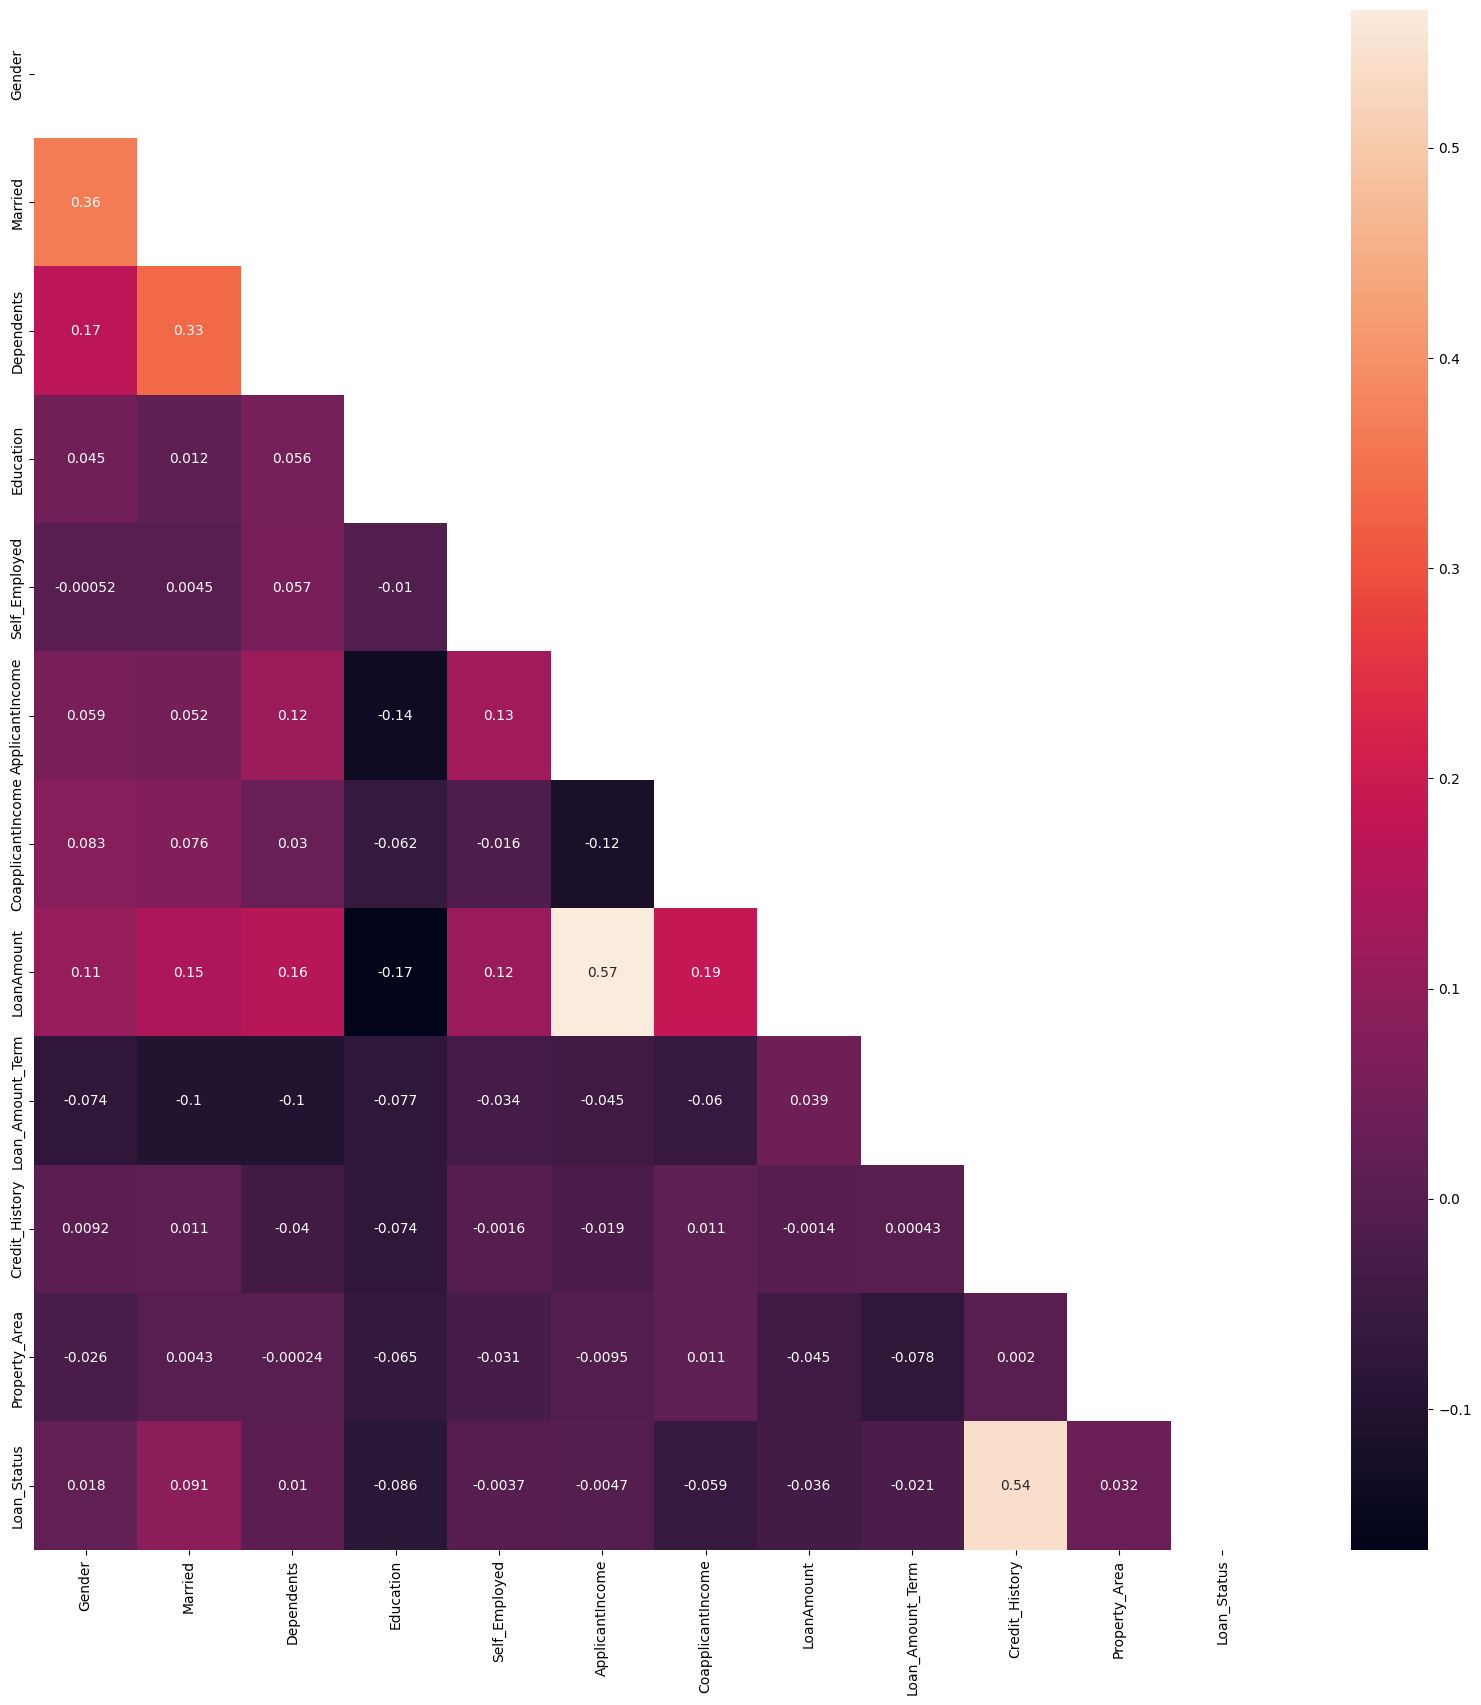

In [26]:
# correlation matrix
plt.figure(figsize = (20,20))

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot= True, mask = matrix)

We are not able to get a clear picture for the positive and negative correlation of labels.

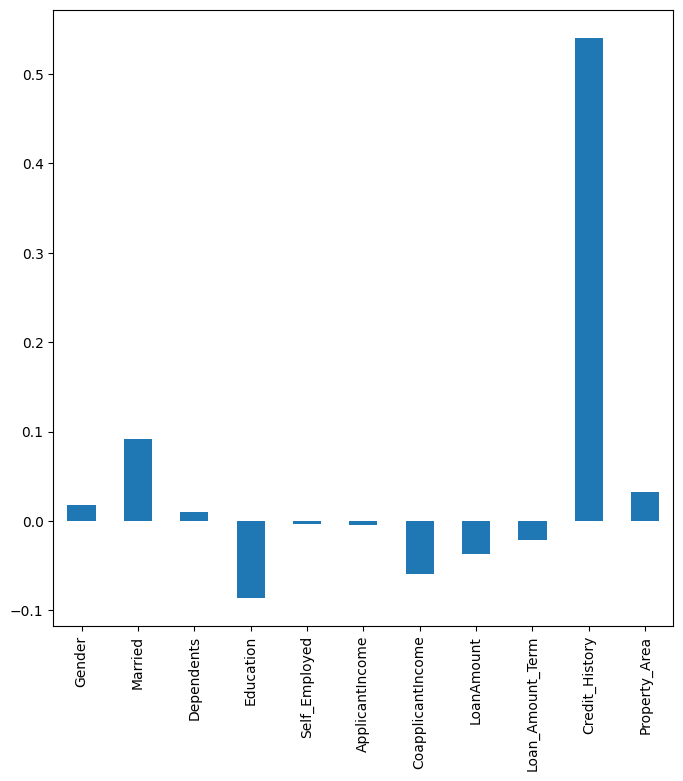

In [27]:
# calculating correlation matrix
df_corr = df.corr()

# plotting
plt.figure(figsize=(8,8))
df_corr['Loan_Status'].drop('Loan_Status').plot.bar()
plt.show()


In [28]:
# Using Z score to remove Outliers
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
print('Before Removal',df.shape)
print('After Removal',df1.shape)
df = df1.copy()

Before Removal (614, 12)
After Removal (577, 12)


In [29]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [30]:
# Log transform to fix skewness
for i in num_datatype:
  if df.skew().loc[i]>0.5:
    df[i] = np.log1p(df[i])

In [31]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [32]:
# Splitting 
X = df.drop('Loan_Status', axis = 1)
Y = df['Loan_Status']

In [33]:
Y.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

In [34]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
# class imbalance
from imblearn.over_sampling import SMOTE
os = SMOTE()
X,Y = os.fit_resample(X,Y)  

In [36]:
# checking
Y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

In [37]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.483694,-1.343719,-0.707629,-0.583499,-0.378703,0.708143,-1.100247,0.344775,0.239811,0.582791,1.206864
1,0.483694,0.768846,0.309310,-0.583499,-0.378703,0.269063,0.805199,0.017364,0.239811,0.582791,-1.295698
2,0.483694,0.768846,-0.707629,-0.583499,2.848543,-0.493665,-1.100247,-1.590290,0.239811,0.582791,1.206864
3,0.483694,0.768846,-0.707629,1.812070,-0.378703,-0.763028,0.921514,-0.139745,0.239811,0.582791,1.206864
4,0.483694,-1.343719,-0.707629,-0.583499,-0.378703,0.754027,-1.100247,0.252983,0.239811,0.582791,1.206864


In [38]:
# Random State
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_acc=0
max_rs=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>max_acc:
        max_acc=acc_score
        max_rs=i

print("Best accuracy score is", max_acc,"on Random State", max_rs)

Best accuracy score is 83.91959798994975 on Random State 433


In [39]:
model = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 86)
    
# Training the model
model.fit(X_train, Y_train)
    
# Predicting Y_test
pred = model.predict(X_test)
    
# Classification Report
class_report = classification_report(Y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Accuracy Score
acc_score = (accuracy_score(Y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Cross Validation Score
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.64      0.76        84
           1       0.79      0.96      0.86       115

    accuracy                           0.82       199
   macro avg       0.85      0.80      0.81       199
weighted avg       0.84      0.82      0.82       199

Accuracy Score: 82.41206030150754
Cross Validation Score: 74.75707547169812

Accuracy Score - Cross Validation Score is 7.654984829809422
